In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
print(tf.__version__)

2.1.0


# Import Dataset

In [4]:
train = pd.read_excel("C:\\Users\\Moaz\\Desktop\\moaz\\WORK\\Participants_Data_Used_Cars\\Data_Train.xlsx")
test = pd.read_excel("C:\\Users\\Moaz\\Desktop\\moaz\\WORK\\Participants_Data_Used_Cars\\Data_Test.xlsx")

In [5]:
# take a look at the dataset
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


## Train set preprocessing

In [7]:
train.shape

(6019, 13)

In [8]:
# data-type

train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [9]:
# Statistics

train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
# Checking null values in all columns

train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
train['Engine'] = train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
train['Mileage'] = train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
train['Power'] = train['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
train['Manufacturer'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[:1])).astype(str)
train['Brand'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2])).astype(str)

train['New_Price'].replace(np.nan, '0 Lakh', inplace=True)
train['New_Price'] = train['New_Price'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [12]:
# Calculate averages

avg_mileage = train['Mileage'].astype('float').mean(axis=0)
avg_power = train['Power'].astype('float').mean(axis=0)
avg_engine = train['Engine'].astype('float').mean(axis=0)
avg_seat = train['Seats'].astype('float').mean(axis=0)

# replace missing values with averages

train["Mileage"].replace(np.nan, avg_mileage, inplace=True)
train["Power"].replace(np.nan, avg_power, inplace=True)
train["Engine"].replace(np.nan, avg_engine, inplace=True)
train['Seats'].replace(np.nan, avg_seat, inplace=True)

In [13]:
loct = train.groupby(["Location"])["Price"].mean()
tran = train.groupby("Transmission")["Price"].mean()
fu = train.groupby("Fuel_Type")["Price"].mean()
own = train.groupby("Owner_Type")["Price"].mean()
manu= train.groupby("Manufacturer")["Price"].mean()
bran = train.groupby("Brand")["Price"].mean()

In [14]:
train['Location'].replace(loct.index, [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
train['Transmission'].replace(tran.index, [1,2], inplace=True)
train['Fuel_Type'].replace(fu.index, [1,2,3,4,5], inplace=True)
train['Owner_Type'].replace(own.index, [1,2,3,4], inplace=True)
train['Manufacturer'].replace(manu.index, manu.values, inplace=True)
train['Brand'].replace(bran.index, bran.values, inplace=True)

In [15]:
del train['Name']
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Brand
0,10,2010,72000,1,2,1,26.60,998.0,58.16,5.0,0.00,1.75,4.517267,2.815714
1,11,2015,41000,2,2,1,19.67,1582.0,126.20,5.0,0.00,12.50,5.343433,12.177634
2,3,2011,46000,5,2,1,18.20,1199.0,88.70,5.0,8.61,4.50,5.411743,6.039828
3,3,2012,87000,2,2,1,20.77,1248.0,88.76,7.0,0.00,6.00,4.517267,6.964800
4,4,2013,40670,2,1,3,15.20,1968.0,140.80,5.0,0.00,17.74,25.537712,18.397051


In [16]:
train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Manufacturer         0
Brand                0
dtype: int64

[Text(0.5, 0, 'Location'),
 Text(1.5, 0, 'Year'),
 Text(2.5, 0, 'Kilometers_Driven'),
 Text(3.5, 0, 'Fuel_Type'),
 Text(4.5, 0, 'Transmission'),
 Text(5.5, 0, 'Owner_Type'),
 Text(6.5, 0, 'Mileage'),
 Text(7.5, 0, 'Engine'),
 Text(8.5, 0, 'Power'),
 Text(9.5, 0, 'Seats'),
 Text(10.5, 0, 'New_Price'),
 Text(11.5, 0, 'Price'),
 Text(12.5, 0, 'Manufacturer'),
 Text(13.5, 0, 'Brand')]

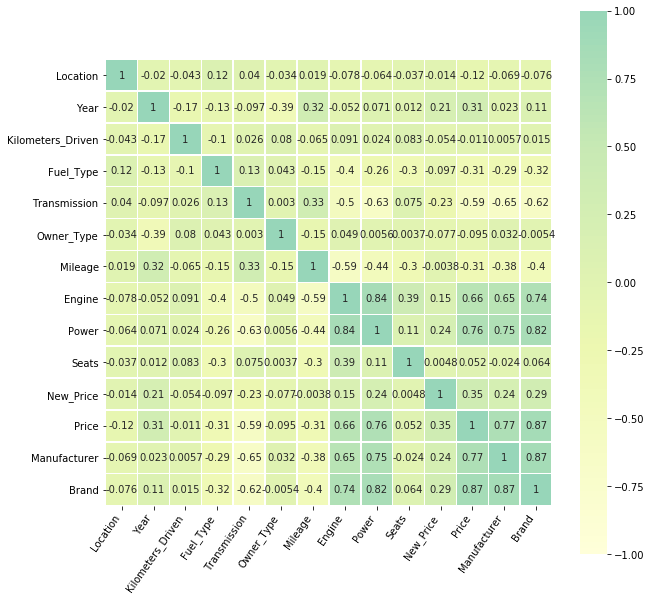

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    train.corr(), 
    vmin=-1, vmax=1 , center=2,
    square=True,
    annot=True,
    linewidths=.5,
    cmap="YlGnBu" )

#Rotating labels on x axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=55,
    horizontalalignment='right'
)

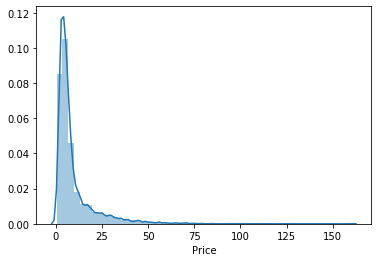

In [19]:
sns.distplot(train['Price'])

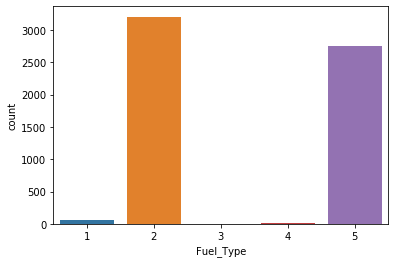

In [20]:
sns.countplot(train['Fuel_Type'])

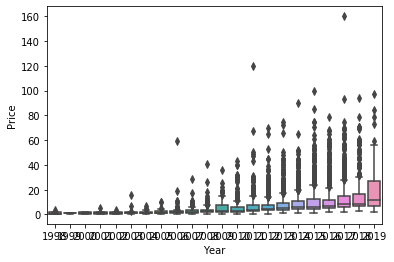

In [24]:
sns.boxplot(x='Year',y='Price',data=train)

## Test set preprocessing

In [25]:
test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [27]:
test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [28]:
test['Engine'] = test['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
test['Mileage'] = test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
test['Power'] = test['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
test['Manufacturer'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[:1])).astype(str)
test['Brand'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2])).astype(str)

test['New_Price'].replace(np.nan, '0 Lakh', inplace=True)
test['New_Price'] = test['New_Price'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [29]:
avg_power2 = test['Power'].astype('float').mean(axis=0)
avg_engine2 = test['Engine'].astype('float').mean(axis=0)
avg_seat2 = test['Seats'].astype('float').mean(axis=0)

# replace missing values with averages

test["Power"].replace(np.nan, avg_power, inplace=True)
test["Engine"].replace(np.nan, avg_engine, inplace=True)
test['Seats'].replace(np.nan, avg_seat, inplace=True)

In [30]:
a = test['Manufacturer'].value_counts()
b = test['Brand'].value_counts()

In [31]:
test['Location'].replace(loct.index, [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
test['Transmission'].replace(tran.index, [1,2], inplace=True)
test['Fuel_Type'].replace(fu.index, [1,2,3,4,5], inplace=True)
test['Owner_Type'].replace(own.index, [1,2,3,4], inplace=True)
test['Manufacturer'].replace(a.index, a.values, inplace=True)
test['Brand'].replace(b.index, b.values, inplace=True)

In [32]:
del test['Name']
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer,Brand
0,5,2014,40929,1,2,1,32.26,998.0,58.20,4.0,0.00,233,40
1,4,2013,54493,5,2,3,24.70,796.0,47.30,5.0,0.00,233,40
2,10,2017,34000,2,2,1,13.68,2393.0,147.80,7.0,25.27,96,39
3,6,2012,139000,2,2,1,23.59,1364.0,0.00,5.0,0.00,96,19
4,10,2014,29000,5,2,1,18.50,1197.0,82.85,5.0,0.00,233,56


In [33]:
test.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Manufacturer         0
Brand                0
dtype: int64

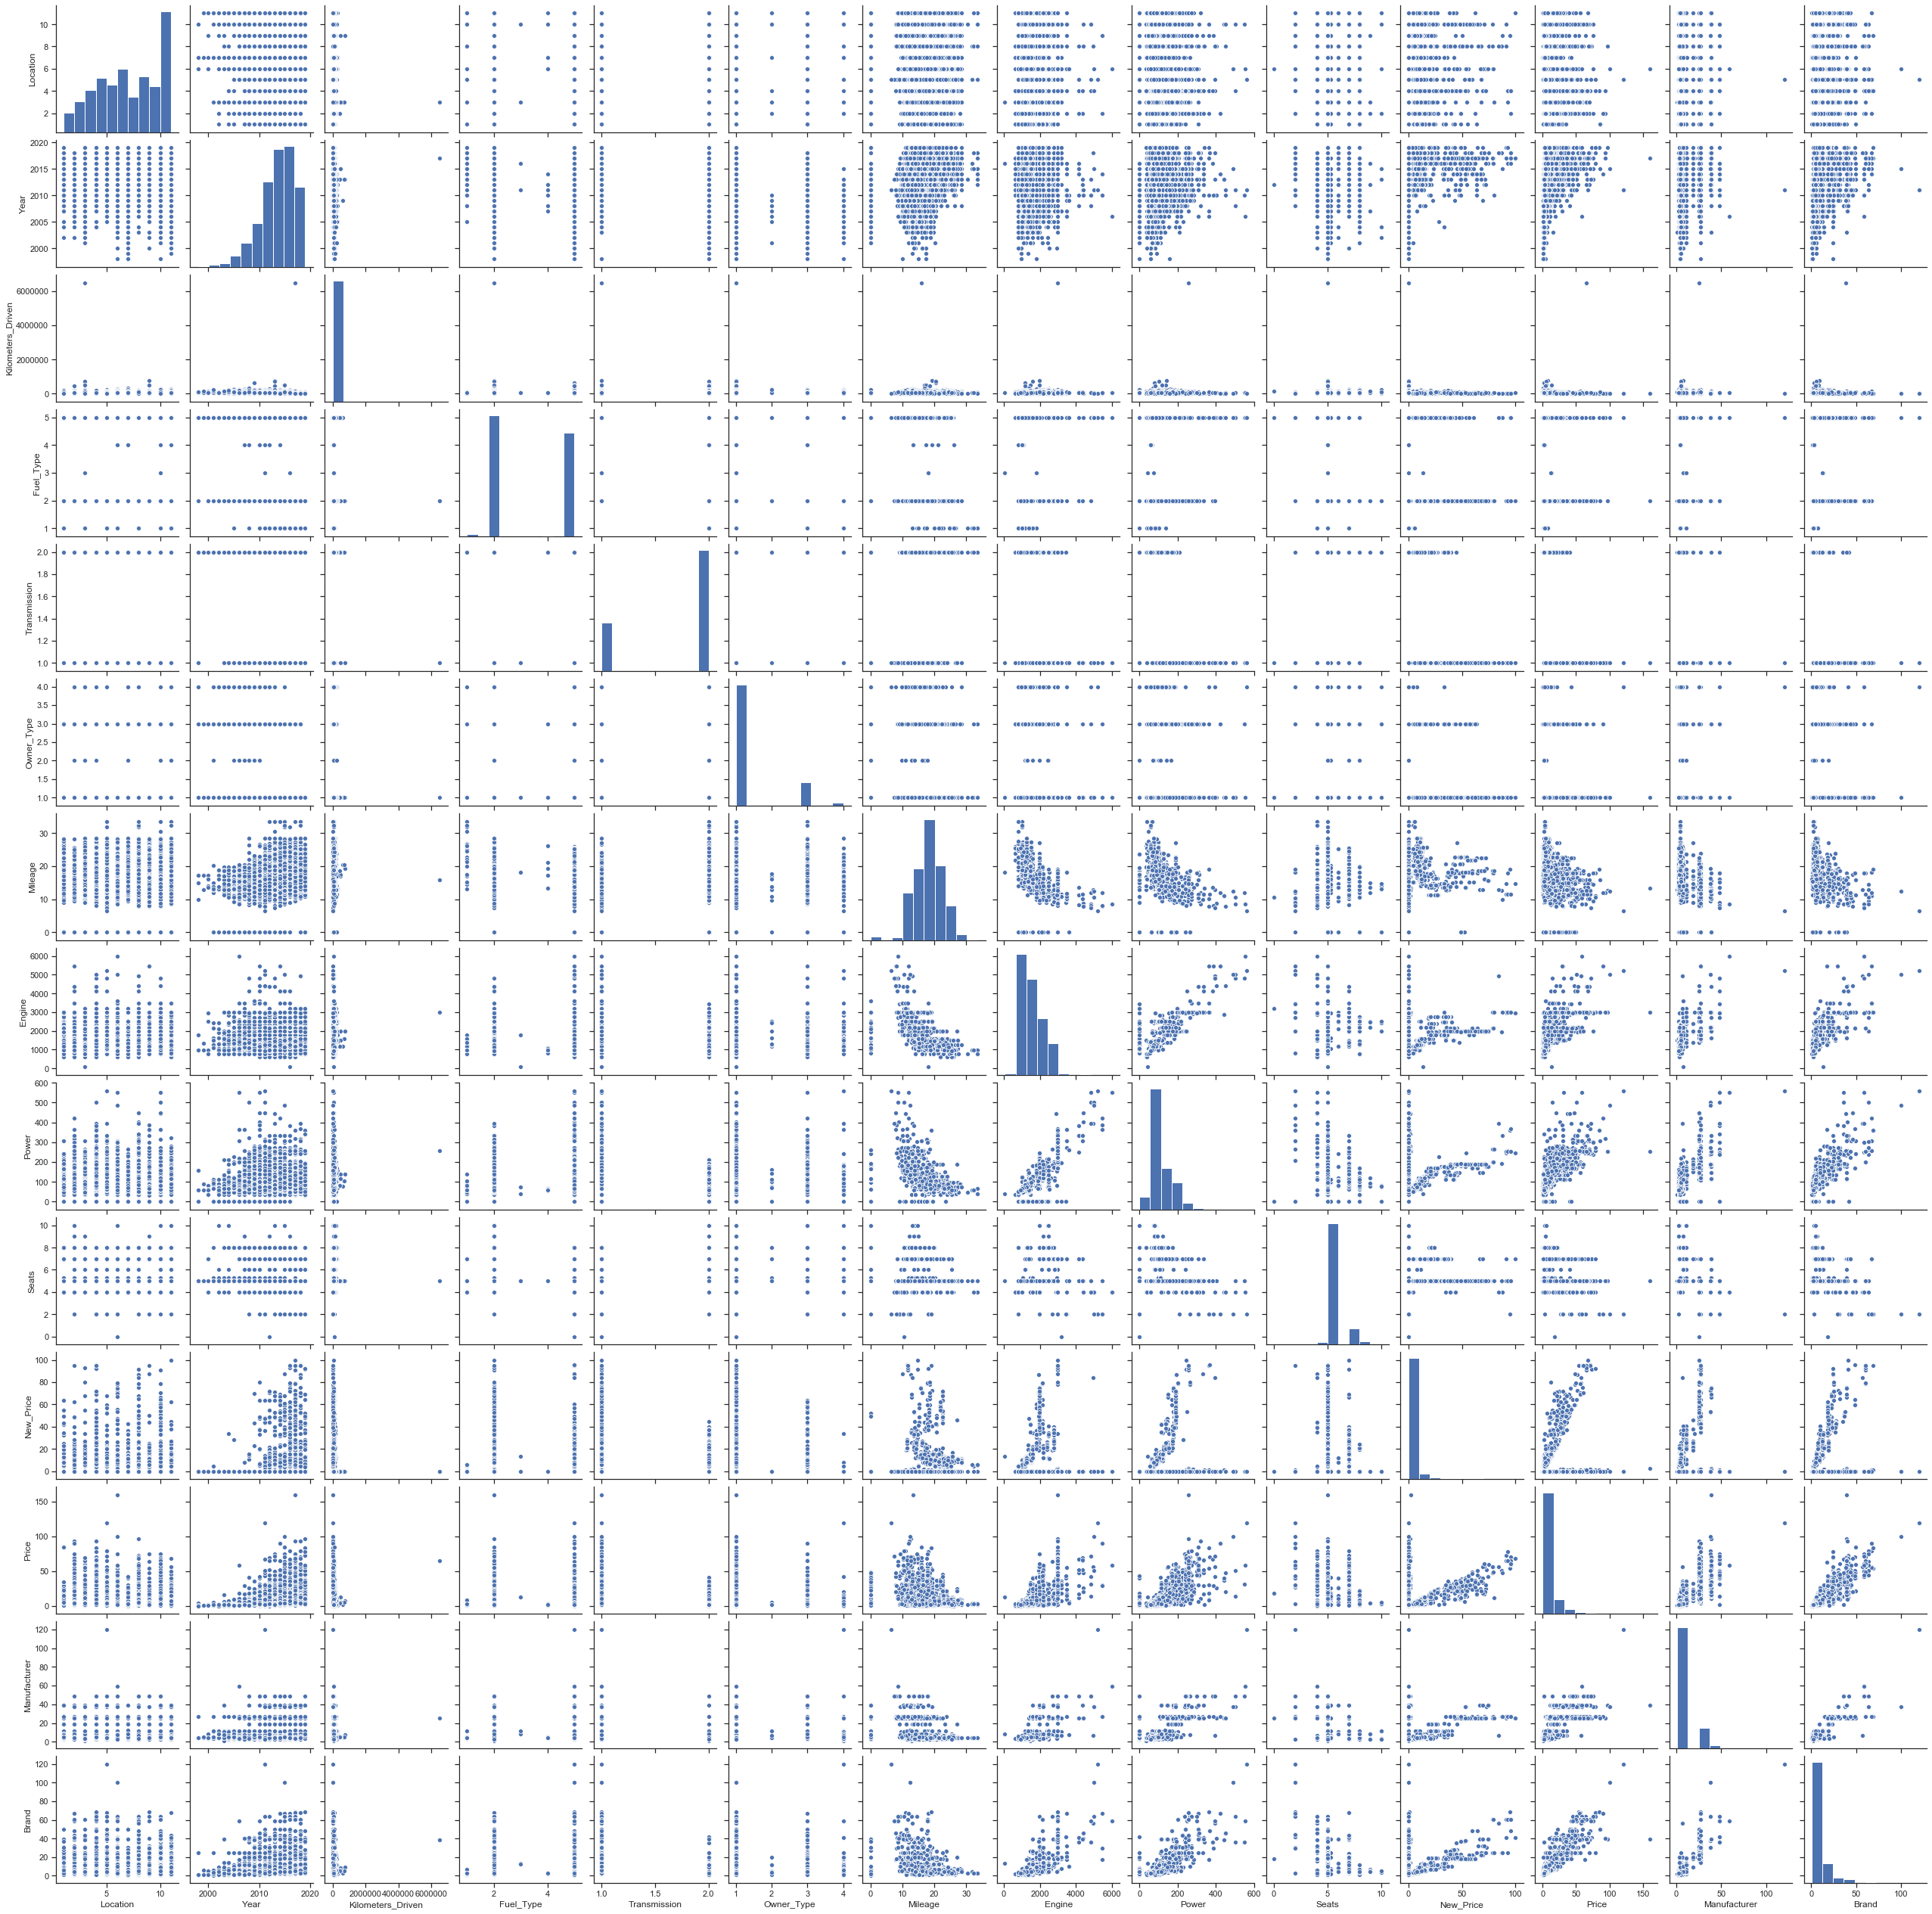

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train)

# Scaling and Splitting

In [34]:
y = train["Price"]
X = train.drop(['Price','New_Price'], axis = 1)


In [35]:
X.shape, y.shape

((6019, 12), (6019,))

In [36]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Location,6019.0,6.619704,2.955933,1.00,4.000000,7.000000,9.000000,11.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.000000,2014.000000,2016.000000,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.000000,53000.000000,73000.000000,6500000.00
Fuel_Type,6019.0,3.363017,1.504939,1.00,2.000000,2.000000,5.000000,5.00
Transmission,6019.0,1.714238,0.451814,1.00,1.000000,2.000000,2.000000,2.00
Owner_Type,6019.0,1.379465,0.818458,1.00,1.000000,1.000000,1.000000,4.00
Mileage,6019.0,18.134961,4.581528,0.00,15.170000,18.150000,21.100000,33.54
Engine,6019.0,1621.276450,599.553865,72.00,1198.000000,1493.000000,1969.000000,5998.00
Power,6019.0,111.227632,55.294789,0.00,74.000000,93.700000,138.030000,560.00
Seats,6019.0,5.278735,0.806012,0.00,5.000000,5.000000,5.000000,10.00


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train.shape, X_test.shape

((4213, 12), (1806, 12))

# TensorFlow Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [41]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam',loss='mse')

In [42]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200)

Train on 4213 samples, validate on 1806 samples
Epoch 1/200
4213/4213 [==============================] - 1s 278us/sample - loss: 206.7127 - val_loss: 179.5356
Epoch 2/200
4213/4213 [==============================] - 0s 24us/sample - loss: 164.8671 - val_loss: 123.6913
Epoch 3/200
4213/4213 [==============================] - 0s 15us/sample - loss: 120.9691 - val_loss: 99.6249
Epoch 4/200
4213/4213 [==============================] - 0s 16us/sample - loss: 95.5583 - val_loss: 72.8187
Epoch 5/200
4213/4213 [==============================] - 0s 20us/sample - loss: 67.3251 - val_loss: 49.7723
Epoch 6/200
4213/4213 [==============================] - 0s 15us/sample - loss: 51.0776 - val_loss: 40.9288
Epoch 7/200
4213/4213 [==============================] - 0s 14us/sample - loss: 42.5001 - val_loss: 34.0054
Epoch 8/200
4213/4213 [==============================] - 0s 14us/sample - loss: 36.3914 - val_loss: 29.9381
Epoch 9/200
4213/4213 [==============================] - 0s 16us/sample - loss: 32

4213/4213 [==============================] - 0s 14us/sample - loss: 12.7183 - val_loss: 11.3450
Epoch 76/200
4213/4213 [==============================] - 0s 19us/sample - loss: 12.7477 - val_loss: 11.8071
Epoch 77/200
4213/4213 [==============================] - 0s 14us/sample - loss: 12.7756 - val_loss: 11.2147
Epoch 78/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.6813 - val_loss: 11.3838
Epoch 79/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.7261 - val_loss: 11.1547
Epoch 80/200
4213/4213 [==============================] - 0s 11us/sample - loss: 12.7285 - val_loss: 11.1133
Epoch 81/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.5865 - val_loss: 12.3146
Epoch 82/200
4213/4213 [==============================] - 0s 15us/sample - loss: 12.7041 - val_loss: 11.1447
Epoch 83/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.7496 - val_loss: 11.1205
Epoch 84/200
4213/4213 [========

4213/4213 [==============================] - 0s 15us/sample - loss: 12.3387 - val_loss: 11.5236
Epoch 150/200
4213/4213 [==============================] - 0s 14us/sample - loss: 11.9345 - val_loss: 11.7756
Epoch 151/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.1264 - val_loss: 10.9682
Epoch 152/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.5464 - val_loss: 10.7227
Epoch 153/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.1545 - val_loss: 10.7698
Epoch 154/200
4213/4213 [==============================] - 0s 13us/sample - loss: 11.9473 - val_loss: 10.7088
Epoch 155/200
4213/4213 [==============================] - 0s 14us/sample - loss: 11.9129 - val_loss: 10.9459
Epoch 156/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.0641 - val_loss: 10.8164
Epoch 157/200
4213/4213 [==============================] - 0s 13us/sample - loss: 12.0679 - val_loss: 11.4123
Epoch 158/200
4213/4213 

In [43]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,206.712748,179.535609
1,164.867104,123.691322
2,120.969075,99.624902
3,95.558277,72.818682
4,67.325062,49.772270
...,...,...
195,11.953317,10.722655
196,11.872144,10.965733
197,11.833313,11.539353
198,11.929291,10.640935


In [44]:
losses = pd.DataFrame(model.history.history)

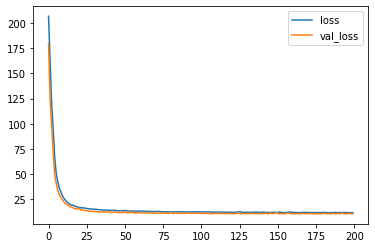

In [45]:
losses.plot()

# Predicting on Test Set

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [47]:
predictions = model.predict(X_test)

In [58]:
predictions

array([[17.671852 ],
       [ 8.13395  ],
       [17.689241 ],
       ...,
       [11.806933 ],
       [ 4.3305264],
       [ 4.1309876]], dtype=float32)

In [48]:
mean_absolute_error(y_test,predictions)

1.640104016435239

In [49]:
np.sqrt(mean_squared_error(y_test,predictions))

3.2580281617481694

In [50]:
explained_variance_score(y_test,predictions)

0.9103515477171563

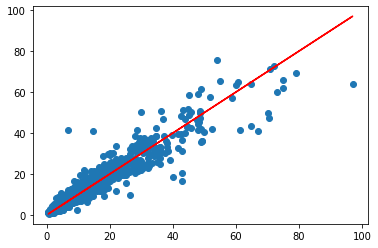

In [53]:
# Our predictions
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

# Predicting on random values generated by me

In [67]:
n = np.array([10, 2015, 10000, 1, 1, 1, 25.5, 500.0, 58.6, 5.0, 4.5, 2.8]).reshape(1,12)
n

array([[1.000e+01, 2.015e+03, 1.000e+04, 1.000e+00, 1.000e+00, 1.000e+00,
        2.550e+01, 5.000e+02, 5.860e+01, 5.000e+00, 4.500e+00, 2.800e+00]])

In [68]:
car = scaler.transform(n)
model.predict(car)

array([[3.9299996]], dtype=float32)